
# 项目：为 *CharityML* 寻找捐赠者





在此项目中，将使用监督学习算法，并使用从 1994 年美国人口普查数据中摘取的数据准确地对个人收入进行建模。目标是构建一个准确预测公民收入是否超过 50,000 美元的模型。公益机构可能会面临此类任务，这些机构需要依赖捐赠。了解公民的收入可以帮助公益机构更好地判断应该请求多少捐赠款，或者是否有必要请求捐赠。虽然直接通过公开的数据判断个人的一般收入范围比较难，但是我们可以通过其他公开特征推断该值。


----
## 一 数据加载及探索数据
加载必要的 Python 库并加载人口普查数据。该数据集中的最后一列 `'income'` 将是目标标签（个人年收入是否超过 50,000 美元）。人口普查数据库中的所有其他列都是关于每个人的特征。

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=2))
# 或者使用下面这个，得到一样的效果
#data.head(2)

data.info()
data.describe()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

.dataframe thead th {
    text-align: left;
}

.dataframe tbody tr th {
    vertical-align: top;
}
</style>
<table border="1" class="dataframe">
  <thead>
<tr style="text-align: right;">
  <th></th>
  <th>age</th>
  <th>workclass</th>
  <th>education_level</th>
  <th>education-num</th>
  <th>marital-status</th>
  <th>occupation</th>
  <th>relationship</th>
  <th>race</th>
  <th>sex</th>
  <th>capital-gain</th>
  <th>capital-loss</th>
  <th>hours-per-week</th>
  <th>native-country</th>
  <th>income</th>
</tr>
  </thead>
  <tbody>
<tr>
  <th>0</th>
  <td>39</td>
  <td>State-gov</td>
  <td>Bachelors</td>
  <td>13.0</td>
  <td>Never-married</td>
  <td>Adm-clerical</td>
  <td>Not-in-family</td>
  <td>White</td>
  <td>Male</td>
  <td>2174.0</td>
  <td>0.0</td>
  <td>40.0</td>
  <td>United-States</td>
  <td>&lt;=50K</td>
</tr>
  </tbody>
</table>
</div>


### 实现：数据探索
大致研究数据集后可以判断每个类别有多少人，并得出年收入超过 50,000 美元的个人所占百分比。在下面的代码单元格中，你将需要计算以下值：
- 记录总条数：`'n_records'`
- 年收入超过 50,000 美元的人数：`'n_greater_50k'`.
- 年收入不超过 50,000 美元的人数：`'n_at_most_50k'`.
- 年收入超过 50,000 美元的个人所占百分比：`'greater_percent'`.

** 提示：**你可能需要查看上述表格，了解 `'income'` 条目的格式。

In [3]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income']=='>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income']=='<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k / n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2%}".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** 特征集探索**

* **age**：连续值。
* **workclass**：Private、Self-emp-not-inc、Self-emp-inc、Federal-gov、Local-gov、State-gov、Without-pay、Never-worked。
* **education**：Bachelors、Some-college、11th、HS-grad、Prof-school、Assoc-acdm、Assoc-voc、9th、7th-8th、12th、Masters、1st-4th、10th、Doctorate、5th-6th、Preschool。
* **education-num**：连续值。
* **marital-status**：Married-civ-spouse、Divorced、Never-married、Separated、Widowed、Married-spouse-absent、Married-AF-spouse。
* **occupation**：Tech-support、Craft-repair、Other-service、Sales、Exec-managerial、Prof-specialty、Handlers-cleaners、Machine-op-inspct、Adm-clerical、Farming-fishing、Transport-moving、Priv-house-serv、Protective-serv、Armed-Forces。
* **relationship**：Wife、Own-child、Husband、Not-in-family、Other-relative、Unmarried。
* **race**：Black、White、Asian-Pac-Islander、Amer-Indian-Eskimo、Other。
* **sex**：Female、Male。 
* **capital-gain**：连续值。
* **capital-loss**：连续值。
* **hours-per-week**：连续值。
* **native-country**：United-States、Cambodia、England、Puerto-Rico、Canada、Germany、Outlying-US(Guam-USVI-etc)、India、Japan、Greece、South、China、Cuba、Iran、Honduras、Philippines、Italy、Poland、Jamaica、Vietnam、Mexico、Portugal、Ireland、France、Dominican-Republic、Laos、Ecuador、Taiwan、Haiti、Columbia、Hungary、Guatemala、Nicaragua、Scotland、Thailand、Yugoslavia、El-Salvador、Trinadad&Tobago、Peru、Hong、Holand-Netherlands。

----
## 准备数据
在将数据作为机器学习算法的输入之前，通常必须整理数据、调整数据格式和结构，这一流程通常称之为**预处理**。幸运的是，该数据集没有必须处理的无效或丢失条目，但是某些特征质量不高，必须加以调整。预处理流程可以大大改善几乎所有学习算法的输出结果和预测能力。

### 转换偏斜连续特征
数据集可能通常至少包含一个具有以下特性的特征：值几乎都接近某个数字，但是也有极端值或比该数字大很多或小很多的值。算法会受到此类值分布的影响，如果值的范围没有正确标准化，算法的效果会大打折扣。对于人口普查数据集来说，有两个特征属于这种情况：'`capital-gain'` 和 `'capital-loss'`。

运行以下代码单元格以为这两个特征绘制直方图。注意值的范围以及分布情况。

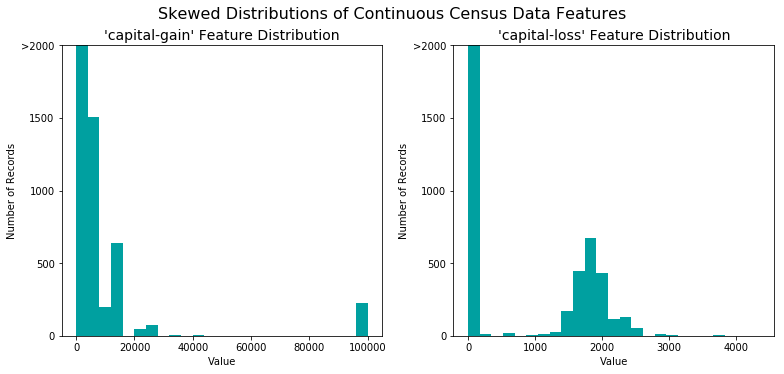

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

对于 `'capital-gain'` 和 `'capital-loss'` 等高度偏斜的特征分布，通常我们都会对数据应用<a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">对数转换</a>，以便非常大和非常小的值不会对学习算法的性能带来负面影响。对数转换可以显著缩小离群值造成的值范围。但是在应用这种转换时必须谨慎：`0` 的对数未定义，因此我们必须让这些值加上一个比 `0` 大的很小的值，以便成功地应用对数算法。

运行以下代码单元格以对数据进行转换并可视化结果。同样，注意值的范围和分布情况。

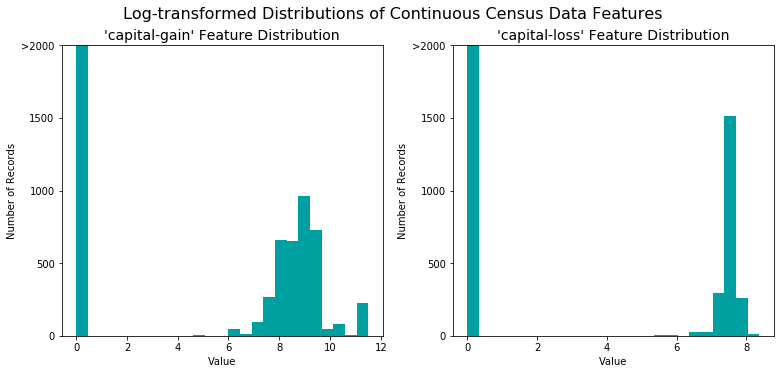

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### 标准化数字特征
除了需要对高度偏斜的特征进行转换之外，通常还建议对数字特征进行某种缩放。对数据进行缩放不会更改每个特征（例如上述 `'capital-gain'` 或 `'capital-loss'`）的分布形状；但是，标准化可以确保在应用监督式学习器时，能够平等地对待每个特征。注意应用缩放之后，观察原始形式的数据将不再具有相同的原始含义，如下所示。

运行以下代码单元格以标准化每个数字特征。为此，我们将使用 [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)。

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### 实现：数据预处理

在上面的**探索数据**表格中，我们发现每个记录都有多个特征是非数字特征。通常，学习算法都预期输入是数字，这就需要转换非数字特征（称为*分类变量*）。一种转换分类变量的常见方式是**独热编码**方法。独热编码会为每个非数字特征的每个可能类别创建一个_“虚拟”_变量。例如，假设 `someFeature` 有三个潜在条目：`A`、`B` 或 `C`。我们将此特征编码为 `someFeature_A`、`someFeature_B` 和 `someFeature_C`。

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

此外，和非数字特征一样，我们需要将非数字目标标签 `'income'` 转换为数字值，以便学习算法能正常运行。因为此标签只有两个可能的类别（“<=50K”和“>50K”），我们可以直接将这两个类别分别编码为 `0` 和 `1`，而不用采用独热编码。在下面的代码单元格中，你需要实现以下步骤：

 - 使用 [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) 对 `'features_log_minmax_transform'` 数据进行独热编码。
 - 将目标标签 `'income_raw'` 转换为数字条目。
   - 将“<=50K”的记录设为 `0`，并将“>50K”的记录设为 `1`。

In [7]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
nonnumerical = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
#features_final = pd.DataFrame(data = features_log_minmax_transform)
#features_final = pd.get_dummies(features_final[nonnumerical])

#features_final = pd.get_dummies(features_log_minmax_transform[nonnumerical])

features_final = pd.get_dummies(features_log_minmax_transform) #返回df类型
# TODO: Encode the 'income_raw' data to numerical values
'''
# first
income = pd.DataFrame(data = income_raw)
income = income.income.map({'<=50K':0, '>50K':1}) # income is df, income.income is Series
# second
income = income_raw.apply(lambda x: 0 if x == '<=50K' else 1) #返回series
# third
income = (income_raw=='>50K').astype(int) #返回series
'''

'''
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
income = encoder.fit_transform(income_raw) #返回ndarray
'''
income = (income_raw=='>50K').astype(int) #返回series
#income = pd.get_dummies(income_raw) 这样不行，它返回的是df

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)

print('income:', income)
type(income)


103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

pandas.core.series.Series

### 随机打乱并拆分数据
现在，所有_分类变量_都已转换成数字特征，所有数字特征都已标准化。像往常那样，现在我们将数据（包括特征和标签）拆分为训练集和测试集。80% 的数据用于训练，20% 用于测试。

运行以下代码单元格以进行拆分。

In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## 评估模型效果
在此部分，我们将研究四种不同的算法，并判断哪个算法最适合对数据进行建模。其中三个算法将为监督式学习器（你可以随意选择），第四个算法称为*朴素预测器*。

### 指标和朴素预测器
*CharityML* 研究后发现，收入超过 50,000 美元的个人最有可能向他们的组织捐赠。因此，*CharityML* 非常希望准确地知道哪些人的收入超过了 50,000 美元。似乎使用**准确率**作为评估模型效果的指标比较合适。此外，将收入不到 50,000 美元的个人预测为收入超过 50,000 美元对 *CharityML* 有不利的影响，因为他们希望找到愿意捐赠的个人。因此，模型能够准确地预测收入超过 50,000 美元的个人比模型能够**召回**这些个人_更重要_。我们可以使用 **F-β 分数**作为同时考虑精确率和召回率的指标：

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

具体而言，当 $\beta = 0.5$ 时，我们更关注精确率。这称为 **F$_{0.5}$ 分数**（简称 F-分数）。

查看分类数据（收入最多达到 50,000 美元和收入超过 50,000 美元的人群）分布图之后，很明显大部分人收入不超过 50,000 美元。这样会对**准确率**带来很大的影响，因为我们可以不用查看数据直接说*“此人收入不超过 50,000 美元”*，并且通常都正确！发表这种言论比较**幼稚**，因为我们都没有考虑任何信息来支持这一言论。考虑数据的*朴素预测*始终很重要，因为这样可以建立判断模型是否效果很好的基准。但是，使用这种预测毫无意义：如果我们预测所有人的收入都不到 50,000 美元，则 *CharityML* 无法发现任何捐赠者。


#### 注意：准确率、精确率、召回率总结

**准确率**衡量的是分类器做出正确预测的概率，即正确预测的数量与预测总数（测试数据点的数量）之比。

**精确率**指的是分类为垃圾短信的短信实际上是垃圾短信的概率，即真正例（分类为垃圾内容并且实际上是垃圾内容的字词）与所有正例（所有分类为垃圾内容的字词，无论是否分类正确）之比，换句话说，是以下公式的比值结果：

`[True Positives/(True Positives + False Positives)]`

**召回率（敏感性）**表示实际上为垃圾短信并且被分类为垃圾短信的短信所占比例，即真正例（分类为垃圾内容并且实际上是垃圾内容的字词）与所有为垃圾内容的字词之比，换句话说，是以下公式的比值结果：

`[True Positives/(True Positives + False Negatives)]`

对于偏态分类分布问题（我们的数据集就属于偏态分类），例如如果有 100 条短信，只有 2 条是垃圾短信，剩下的 98 条不是，则准确率本身并不是很好的指标。我们将 90 条消息分类为垃圾内容（包括 2 条垃圾内容，但是我们将其分类为非垃圾内容，因此它们属于假负例），并将 10 条消息分类为垃圾内容（所有 10 个都是假正例），依然会获得比较高的准确率分数。对于此类情形，精确率和召回率非常实用。可以通过这两个指标获得 F1 分数，即精确率和召回率分数的加权平均值（调和平均数）。该分数的范围是 0 到 1，1 表示最佳潜在 F1 分数（在计算比值时取调和平均数）。

### 问题 1 - 朴素预测器效果
* 如果我们选择一个始终预测个人收入超过 50,000 美元的模型，该模型在该数据集中的准确率和 F-分数是多少？你必须使用以下代码单元格并将结果赋值给 `'accuracy'` 和 `'fscore'` 以供稍后使用。

** 请注意：**生成朴素预测器的目的是展示没有任何智能信息的基本模型是怎样的模型。在现实生活中，理想情况下，基本模型要么是以前模型的结果，要么基于你希望完善的研究论文。如果没有基准模型，获得比随机选择的模型结果更好的模型是一个不错的起点。

** 提示：** 

* 如果模型始终预测“1”（即个人收入超过 5 万美元），则模型没有真负例 (TN) 或假负例 (FN)，因为我们没有做出任何负面预测（ “0”值）。因此，在这种情况下，准确率和精确率一样（真正例/）真正例 + 假正例）），因为值为“1”但是应该为“0”的预测都变成假正例；因此，这种情况下的分母是记录总数。
* 在这种情况下，召回率分数（真正例/（真正例 + 假负例））变成 1，因为没有假负例。

In [9]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
TP = np.sum(income)
Total = len(income)
FP = Total - TP
TN = 0
FN = 0
accuracy = TP / Total
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + np.square(beta)) * (precision * recall) / (np.square(beta) * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  监督式学习模型
**以下是** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **中目前提供的一些监督式学习模型，你可以从中选择几个模型：**
- 高斯朴素贝叶斯 (GaussianNB)
- 决策树
- 集成方法（Bagging、AdaBoost、随机森林法、Gradient Boosting）
- K 近邻法 (KNeighbors)
- 随机梯度下降法分类器 (SGDC)
- 支持向量机 (SVM)
- 逻辑回归

### 问题 2 - 模型应用
从上述监督式学习模型中选择三个你认为适合解决该问题的模型，并且你将用这些模型对该人口普查数据进行检验。对于所选的每个模型

- 描述该模型的一个实际应用领域。
- 该模型的优势是什么；何时效果很好？
- 该模型的缺点是什么；何时效果很差？
- 根据你对数据的了解情况，为何该模型适合解决该问题？

** 提示：**

请按照上述格式填写答案^，针对你所选的三个模型分别回答这 4 个问题。请在答案中附上参考资料。

**答案：**

一 高斯朴素贝叶斯 (GaussianNB)
1. 对借款人进行分类
根据负债率，经营稳定性，上下游稳定性，供应链条稳定性等来对借款人进行分类
2. 优：
（1）发源于古典数学理论，有稳定的分类效率
（2）对缺失数据不太敏感，算法也比较简单
3. 缺：
（1）特征间不是相互独立的话，表现不太好
（2）分类精度可能不高
4. 该问题中希望分类稳定，而此模型可以带来较稳定的分类

二 随机森林
1. 
预测心脏病高发人群 Benjamin EJ, Blaha MJ, Chiuve S, et al.
Heart Disease and Stroke Statistics - 2017 Update: A Report From the American
Heart Association. Circulation 2017;Jan 25 https://zhuanlan.zhihu.com/p/28980190 
根据年龄，性别，胸痛类型，血压，胆固醇等来预测是否患病
2. 优：
（1）能够处理多特征数据
（2）不用做特征选择，能自动确定哪些特征比较重要
（3）在对缺失数据进行估计时，随机森林是一个十分有效的方法，如果有很大一部分的特征遗失，仍可以维持准确度。
3. 缺：
（1）特征过多时，容易出现过拟合
（2）取值划分较多的属性会对随机森林产生更大的影响，所以随机森林在这种数据上产出的属性权值是不可信的。
4. 该问题中有多个特征，而此模型可以处理多个特征

三 Decision Tree
1. 
介绍相亲对象案例 http://www.sohu.com/a/127283445_466874
根据年龄，长相，收入等因素，预测见或不见
2. 优：
（1）容易理解，能直观显示决策过程
（2）可以处理缺失值（missing）， 字符型（nominal）， 数值型（numeric）等数据类型。
（3）对相关属性处理比较好
3. 缺：
（1）对于丢失的数据不能进行准确的预测
（2）决策树的结果可能是不稳定的，因为在数据中一个很小的变化可能导致生成一个完全不同的树
（3）容易出现过拟合
4. 该问题有相关性属性（比如：education_level和education-num），而此模型对相关性属性处理较好

### 实现 - 创建训练和预测管道
为了准确地评估你所选的每个模型的效果，你需要创建一个训练管道和预测管道，使你能够使用各种规模的训练数据快速有效地训练模型，并且对测试数据进行预测。这一部分的实现将用在后面的部分。你需要在下面的代码单元格中实现以下步骤：
 - 从 [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) 中导入 `fbeta_score` 和 `accuracy_score`。
 - 将学习器与取样训练数据拟合，并记录训练时间。
 - 对测试数据 `X_test` 进行预测，并对前 300 个训练数据点 `X_train[:300]` 进行预测。
   - 记录总的预测时间。
 - 计算训练子集和测试集的准确率分数
 - 计算训练子集和测试集的 F 分数。
   - 确保设置 `beta` 参数！

In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results




### 实现：初始模型评估
你需要在代码单元格中实现以下步骤：
- 导入你在前一部分所选的三个监督式学习模型。
- 初始化这三个模型并将它们存储在 `'clf_A'`、`'clf_B'` 和 `'clf_C'`。
  - 针对每个模型使用 `'random_state'`（如果提供了的话）。
  - **注意：**使用每个模型的默认设置——你将在后面的部分调节一个特定的模型。
- 计算 1%、10% 和 100% 的训练数据所包含的条目数。
  - 分别将这些值存储在 `'samples_1'`、 `'samples_10'` 和 `'samples_100'` 中。

**注意：**根据你所选的算法，以下实现可能需要一段时间才能运行完毕！

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.


/Users/jia/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

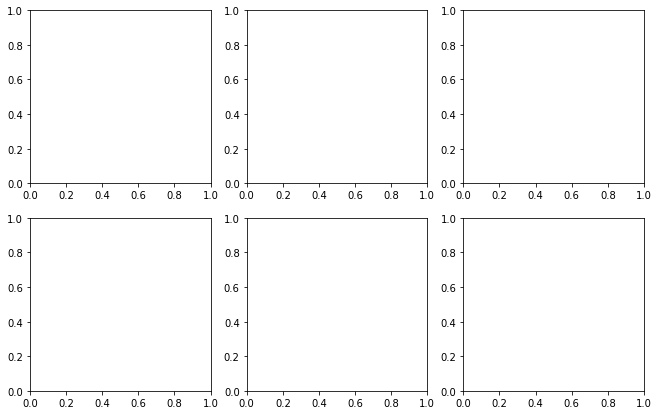

In [13]:

# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=0)
#clf_A = GaussianNB()
#clf_B = RandomForestClassifier(random_state=0)
clf_B = SVC(random_state=0)
clf_C = DecisionTreeClassifier(random_state=0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)
'''

# Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# nitialize the three models
clf_A = SVC(random_state=42)
clf_B = LogisticRegression(random_state=42)
clf_C = DecisionTreeClassifier(random_state=42)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
'''

----
## 改善结果
在最后一部分，你将从三个监督式学习模型中选择用于学员数据的*最佳*模型。然后，你将通过调整至少一个参数，改善未调整模型的 F 分数，从而用整个训练集（`X_train` 和 `y_train`）对模型进行网格搜索优化。 

### 问题 3 - 选择最佳模型

* 根据你之前的评估，用一两段文字向 *CharityML* 解释：在三个模型中，你认为哪个模型最适合发现收入超过 50,000 美元的个人。

** 提示：** 
查看上述单元格左下角的图表（图根据 `vs.evaluate(results, accuracy, fscore) `创建而成），并检查在使用所有训练集时测试集的 F 分数。哪个模型的分数最高？你的答案应该涉及以下内容：
* 指标 - 如果使用了所有的训练数据，则给出测试 F 分数 
* 预测/训练时间
* 算法对数据的适用情况。

**答案：**
Decision Tree最适合，理由如下：
1. 使用所有训练数据：
GaussianNB的 accuracy score 和 f-score 都是最低的
Decision Tree和Random Forest的 accuracy score 和 f-score 都差不多（使用所有数据时可得到相同的分数），其中测试集的f-score约为0.65
2. Decision Tree在预测和测试花的时间都比其他两个少
3. 
GaussianNB在训练集和测试集上表现都比其他两个差。
Random Forest和Decision Tree在训练集中，随着样本增加，分数有所降低；在测试集中，随着样本增加，分数得到提高
它们在训练集表现较好，但是在测试集上泛化能力不足，应该是过拟合了。
但Decision Tree花的时间比Random Forest少很多，而且使用100%测试数据时，可以得到相同的分数，综合判断认为Decision Tree最合适



### 问题 4 - 用通俗的语言描述模型

* 用一两段通俗的文字向 *CharityML* 解释：为何所选的最终模型能够完成任务。确保描述该模型的主要特性，例如模型的训练效果和预测效果。避免使用深奥的数学术语，例如描述方程式。

** 提示：**

在解释模型时，如果你使用了外部资源，请注明引用的所有资源。

**答案：** 
决策树可以通过判断一个或多个事件发生与否，而对后续事件发生与否进行分类，而每一次分类都力求使得所分类更具有同类性或稳定性。

决策树是一个树结构，每个非叶子节点表示在一个特征属性上的测试，每个分支代表这个特征属性在某个值域上的输出，每个叶子节点存放一个类别。进行决策时，从根节点开始，对待分类属性进行判断，按照其值选择输出分支，直至到达叶子节点，将叶子节点存放的类别作为决策结果输出。在某个节点处按照某一特征属性划分不同类别是决策树的关键部分，目标是为了让分类子集尽可能的“纯”，即具有相同的类别。

通过设定决策树的最大深度，每次分裂的最小样本数，每片叶子的最小样本数等参数，可以避免决策树过于复杂而出现过拟合。


### 实现：模型调整
细调所选模型。使用网格搜索 (`GridSearchCV`)，并且至少用 3 个不同的值对至少一个重要参数进行调整。为此，你需要使用整个训练集。你需要在下面的代码单元格中实现以下步骤：
- 导入 [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) 和 [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)。
- 初始化你所选的分类器，并将其存储在 `clf` 中。
 - 将 `random_state`（如果有的话）设为之前设置的状态。
- 针对所选模型创建一个你要调整的参数字典。
 - 示例：`parameters = {'parameter' : [list of values]}`。
 - **注意：**避免调整学习器的 `max_features` 参数（如果有的话）！
- 使用 `make_scorer` 创建 `fbeta_score` 评分对象 ($\beta = 0.5$)。
- 使用 `'scorer'` 对分类器 `clf` 进行网格搜索，并将其存储在 `grid_obj` 中。
- 将网格搜索对象与训练数据 (`X_train`, `y_train`) 进行拟合，并将其存储在 `grid_fit` 中。

**注意：**根据你所选的算法和参数列表，以下实现可能需要一段时间才能运行完毕！

In [16]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score


from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
parameters = {'max_depth':[2,3,4,5,6], 'criterion': ['gini','entropy']}


'''
LogisticRegression:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
parameters = {'C':[0.5, 1.0, 1.5, 2.0], 'intercept_scaling': [0.5, 1.0, 1.5, 2.0], 'penalty':['l1', 'l2'], 'max_iter':[100, 150] }
'''
'''
RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
parameters = {'max_depth': [2,3,4,5,6],  'criterion': ['gini','entropy']}
'''
# TODO: Initialize the classifier


# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8186
F-score on testing data: 0.6279

Optimized Model
------
Final accuracy score on the testing data: 0.8523
Final F-score on the testing data: 0.7224


### 问题 5 - 最终模型评估

* 优化模型在测试数据中的准确率和 F 分数是多少？ 
* 这些分数比未优化模型的分数更高，还是更低？
* 优化模型与在**问题 1** 中得出的朴素预测器基准相比，效果如何？

**注意：**将结果填写在下面的表格中，然后在**答案**文本框内填写描述内容。

#### 结果：

|    指标    | 未优化模型 | 优化模型 |
| :--------: | :--------: | :------: |
| 准确率分数  |  0.8207  |  0.8227    |
|   F 分数   |  0.6335  |  0.6384    |



**答案：**
比未优化高，说明通过网格搜索得到了更好的模型参数。
 
朴素预测器结果如下： 
Accuracy score: 0.2489, F-score: 0.2929
无论在Accuracy score或在F-score上，优化模型明显朴素预测器要高很多。说明优化模型效果会更好。

----
## 特征重要性

在对数据集（例如本项目中研究的人口普查数据）进行监督式学习时，一个重要任务是判断哪些特征的预测能力最强。通过侧重于几个关键特征与目标标签之间的关系，我们简化了对数据规律的理解流程，这么做始终都很有用。对于此项目来说，我们希望发现几个能够最为有效地预测个人收入最多 50,000 美元还是超过 50,000 美元的特征。

选择一个具有 `feature_importance_` 属性的 scikit 学习分类器（例如 adaboost、随机森林），该属性是一种根据所选分类器对特征重要性进行排序的函数。在下个 python 单元格中，将此分类器与训练集进行拟合，并使用此属性确定人口普查数据集的前 5 个最重要的特征。

### 问题 6 - 特征相关性研究
在**探索数据**时发现，人口普查数据中的每条记录有 13 个特征。在这 13 个特征中，你认为哪 5 个特征对预测来说最重要，并且重要性按照什么顺序排序，原因是？

**答案：**

occupation， education_level, education-num, relationship, marital-status。
工作情况一般暗示收入的高低，有好工作的人收入要比没有工作的人收入高；
通常教育程度越高，大部分人的能力也能得到提高，能力强的人收入一般会更高；
一般受教育年限越长，教育程度越高；
家庭情况和谐的人会更有精力投入到工作中，收入也会更高；
婚姻状况也是如此，好的婚姻会使家庭更和谐。

### 实现 - 提取特征重要性信息
选择一个具有 `feature_importance_` 属性的 `scikit-learn` 监督式学习算法。 该属性是一种根据所选算法对特征在进行预测时的重要性进行排序的函数。

你需要在下面的代码单元格中实现以下步骤：
 - 从 sklearn 中导入与之前用到的三个模型不同的监督式学习模型。
 - 用整个训练集训练该监督式模型。
 - 使用 `'.feature_importances_'` 提取特征重要性信息。

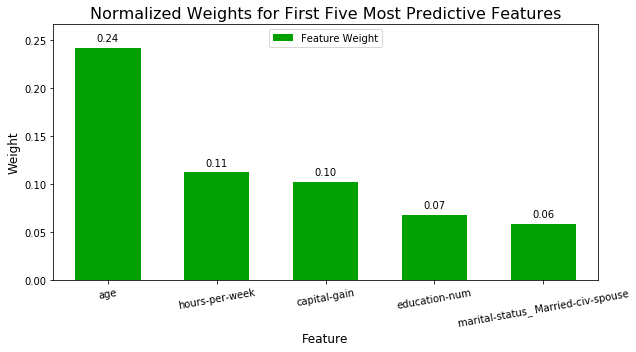

In [17]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
# Plot
vs.feature_plot(importances, X_train, y_train)

### 问题 7 - 提取特征重要性信息

观察上述仅使用 5 个用于预测个人收入最多为 50,000 美元还是超过 50,000 美元的最相关特征创建的可视化图表，然后回答以下问题。
* 这 5 个特征与在**问题 6** 中发现的 5 个特征相比效果如何？
*  如果答案接近，该可视化图表对论证你的结论有何帮助？
* 如果答案不接近，为何你认为这些特征更相关？

**答案：**
大体是接近的。
对论证结果有了数据的支持，而且更加一目了然（哪个重要，比其他重要多少均可看见）。

### 特征选择
如果我们仅从数据的所有特征中选取部分特征，模型效果会如何？当需要训练的特征更少时，训练时间和预测时间预计会缩短很多，但是效果指标会受到影响。从上面的可视化图表可以看出，前 5 个最重要的特征比数据集中**所有**特征一半的重要性带来的影响要大，表明我们可以尝试*缩小特征空间*，并简化模型要学习的信息。以下代码单元格将使用你在之前发现的同一优化模型，并使用相同的训练集进行训练，*但是仅使用前 5 个重要特征*。

In [13]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8227
F-score on testing data: 0.6384

Final Model trained on reduced data
------
Accuracy on testing data: 0.8069
F-score on testing data: 0.5959


### 问题 8 - 特征选择的影响

* 最终模型在仅使用 5 个特征的缩减数据上的 F 分数和准确率分数与在使用所有特征的数据集上的分数相比如何？
* 如果训练时间是一个因素，你会考虑使用缩减的数据作为训练集吗？

**答案：**
缩减数据集的分数相比更低，但下降不多，可见虽然包括所有特征的预测性能更好，但是只使用重要特征可以得到接近的预测，而且能大量降低时间。
会考虑使用缩减数据集。

> **注意**：完成所有代码实现部分并成功地回答了上述每个问题后，你可以将该 iPython Notebook 导出为 HTML 文档并获得最终要提交的项目。为此，你可以使用上面的菜单或依次转到  
 *文件 -> 下载为 -> HTML (.html)**。在提交时，请同时包含该 notebook 和完成的文档。